In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

<h1 style="text-align: center;">An Analysis of Top Investment Banks</h1>

<hr>

<h2> Research Questions to Answer: </h2>

<div class="alert alert-block alert-success">
    <ul><h3><b>
        <li>What are the largest investment banks by market share and how did they trend during a five-year window?</li>
        <li>What are the size of the banks currently based on total revenue and total assets and how do they compare to IB fees?</li>
        <li>How big of a portion of these banks non-interest income are IB fees?</li>  
        <li>What do measures of central tendency and other statistics tell us about the results?</li></b>
    </ul>
</div>

<hr>

<h2> Important Points: </h2>

<div class="alert alert-block alert-info">
    <ul><h3><b>
        <li>2022 numbers were not yet available for all banks.</li>
        <li>Numbers represented are in millions</li>
        <li>We used 10-Ks from the SEC's Edgar database where possible. For banks outside the US, we used annual reports. </li> 
        <li>Each bank has numerous amounts of legal entities, subsidiaries, and lines of business </li></b>
    </ul>
</div>

<hr>

In [4]:
bank_data_to_load = "DATA/final_bank_data.csv"
bank_data_df = pd.read_csv(bank_data_to_load)

In [5]:
color_scheme = ["darkred","orange","purple","green","darkblue","pink","darkgreen","red","teal","blue",]
year = [year for year in bank_data_df["Fiscal Year"].unique()]
x_tick_locations = [value for value in year]


## What are the largest investment banks by market share and how did they trend during a five-year window?

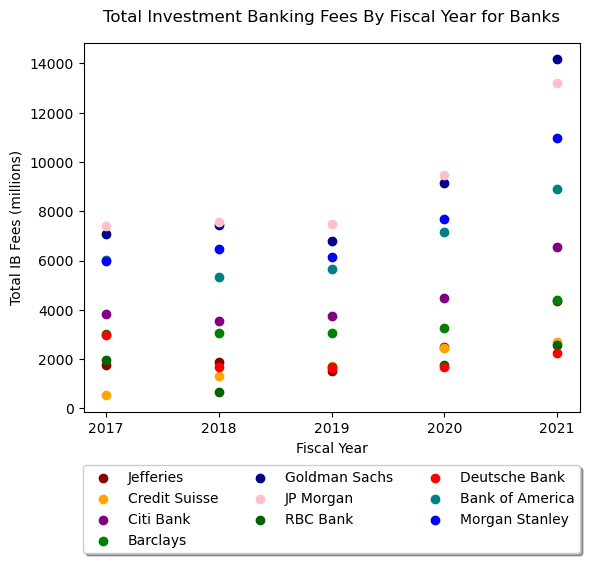

In [6]:
bank_list = bank_data_df['Bank'].unique()

i = 0

while i < len(bank_list):
    plt.scatter(year, bank_data_df.loc[bank_data_df['Bank'] == bank_list[i], ['Total IB Fees']], marker ='o',
                color = color_scheme[i], label=bank_list[i])
    i += 1

plt.xlabel("Fiscal Year")
plt.ylabel("Total IB Fees (millions)")
plt.xticks(x_tick_locations)
plt.rcParams['axes.titley'] = 1.0 
plt.rcParams['axes.titlepad'] = 15 
plt.title("Total Investment Banking Fees By Fiscal Year for Banks")
legend= plt.legend(loc='lower center', bbox_to_anchor=(0.5, -.40),
          ncol=3, fancybox=True, shadow=True)

plt.show()

<div class="alert alert-block alert-info">
    <p>
        <h3>Here we can see that Goldman Sachs has recently overtaken JP Morgan in Investment Banking Revenue. 
        Morgan Stanley has recently rebounded from a slump in 2019. 
        Credit Suisse, RBC, and Jefferies however have all trended near the bottom.</h3>
    </p>
</div>
<hr>

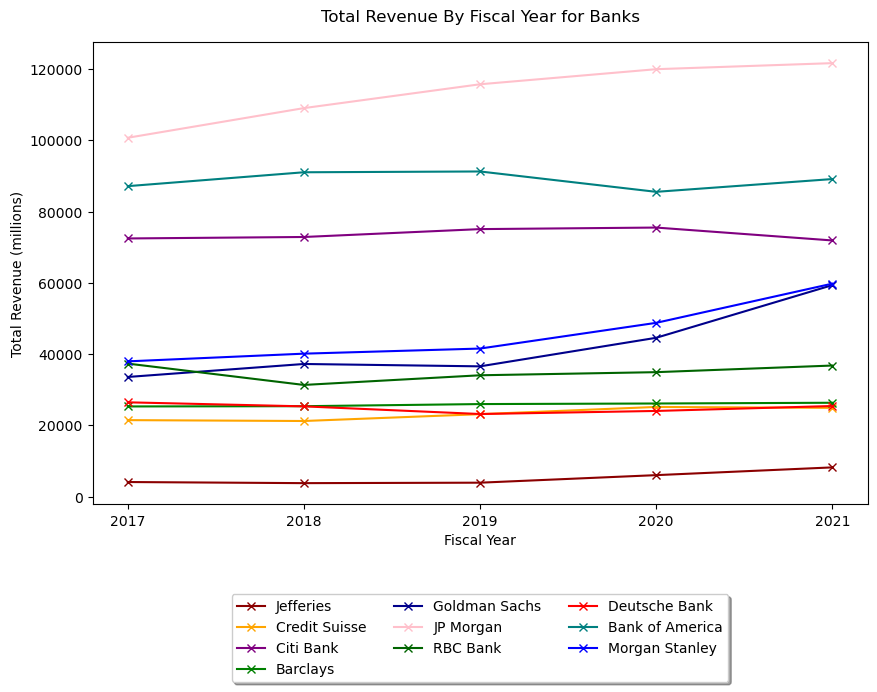

In [7]:
bank_list = bank_data_df['Bank'].unique()

i = 0

plt.figure(figsize=(10,6))

while i < len(bank_list):
    plt.plot(year, (bank_data_df.loc[bank_data_df['Bank'] == bank_list[i], ['Total Revenue']]),
             marker ='x', color = color_scheme[i], label=bank_list[i])
    i += 1

plt.xlabel("Fiscal Year")
plt.ylabel("Total Revenue (millions)")
plt.ticklabel_format(style='plain')
plt.xticks(x_tick_locations)
plt.title("Total Revenue By Fiscal Year for Banks")
legend= plt.legend(loc='lower center', bbox_to_anchor=(0.5, -.40),
          ncol=3, fancybox=True, shadow=True)

plt.show()

<div class="alert alert-block alert-info">
    <p>
        <h3>Total Revenue was high for JP Morgan, which trended above the other banks for the entire study period. 
        Another outlier is Jefferies, which stayed well below the other banks on this measure. </h3>
    </p>
</div>

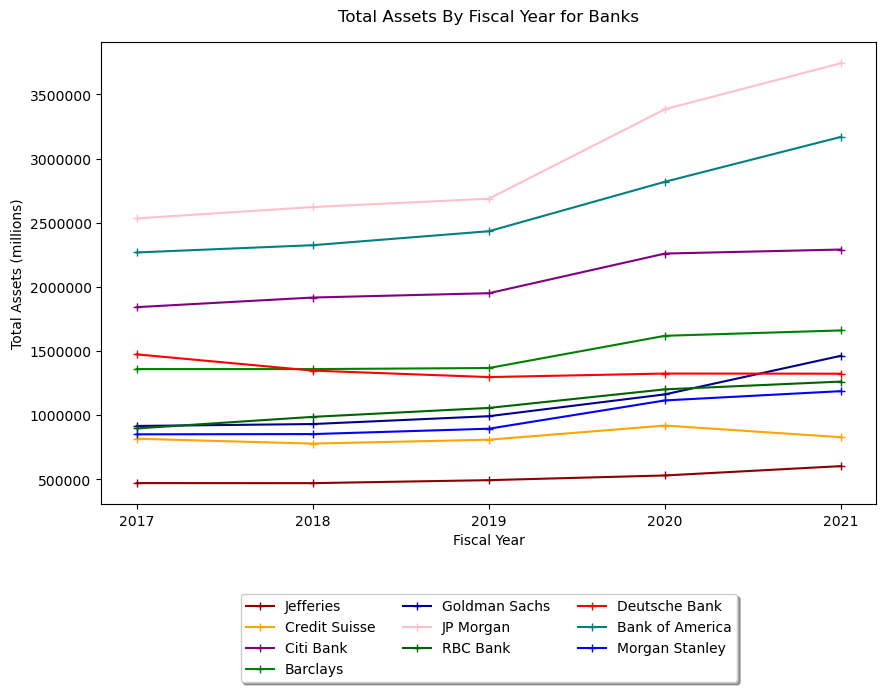

In [8]:
#Total Assets
i = 0
bank_list = bank_data_df['Bank'].unique()
plt.figure(figsize=(10,6))

while i < len(bank_list):
    plt.plot(year, bank_data_df.loc[bank_data_df['Bank'] == bank_list[i], ['Total Assets']], marker ='+',
                color = color_scheme[i], label=bank_list[i])
    i += 1
#plt.locator_params(axis="both", integer=True)
plt.xlabel("Fiscal Year")
plt.ylabel("Total Assets (millions)")
plt.ticklabel_format(style='plain')
plt.xticks(x_tick_locations)
plt.title("Total Assets By Fiscal Year for Banks")
legend= plt.legend(loc='lower center', bbox_to_anchor=(0.5, -.40),
          ncol=3, fancybox=True, shadow=True)

plt.show()

<div class="alert alert-block alert-info">
    <p>
        <h3>Measuring the banks by Total Assets, we notice JP Morgan and Bank of America
        fanning higher than the other banks since 2019.</h3> 
    </p>
</div>

## What are the size of the banks currently based on total revenue and total assets and how do they compare to IB fees??

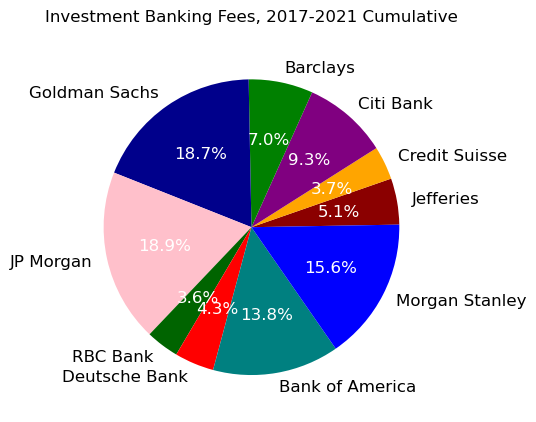

In [9]:
bank_list = bank_data_df['Bank'].unique()

i = 0

bank_pie = []

while i < len(bank_list):
    bank_pie.append(bank_data_df.loc[bank_data_df['Bank'] == bank_list[i],['Total IB Fees']]['Total IB Fees'].sum())
    i += 1

_,_,inner_text = plt.pie(bank_pie, startangle=1, labels=bank_list, autopct='%1.1f%%',
                         textprops={'size': 'large'}, colors=color_scheme)

[inner_text[i].set_color('white') for i in range(len(inner_text))]
plt.figure(1)
plt.title("Investment Banking Fees, 2017-2021 Cumulative")

plt.show()

<div class="alert alert-block alert-info">
    <p>
        <h3>When measuring the last five years fees cumulatively, we can see that Goldman Sachs and JP Morgan are close
        together at the top, while Morgan Stanley and Bank of America are close behind. </h3>
    </p>
</div>

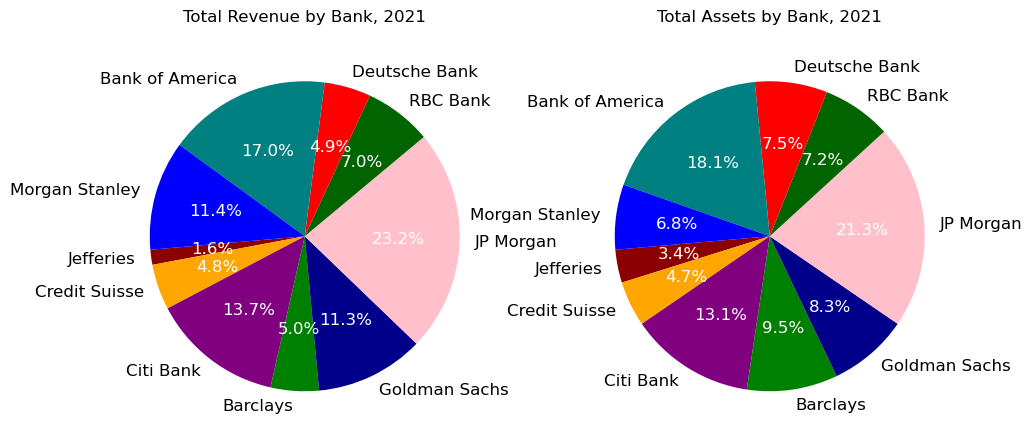

In [10]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(11,11))

revenue_2021 = bank_data_df.groupby('Bank').head(1)
bank_list = []
revenue_list = []

for row in revenue_2021.iterrows():
    bank_list = revenue_2021['Bank']
    revenue_list = revenue_2021['Total Revenue']
TR_pie = np.array(revenue_list)
ax1.set_title("Total Revenue by Bank, 2021")
_,_,inner_text = ax1.pie(revenue_list, startangle=185,labels=bank_list, autopct='%1.1f%%', textprops={'size': 'large'}, colors=color_scheme)
[inner_text[i].set_color('white') for i in range(len(inner_text))]
plt.figure(1)

assets_2021 = bank_data_df.groupby('Bank').head(1)
bank_list = []
assets_list = []
for row in assets_2021.iterrows():
    bank_list = assets_2021['Bank']
    assets_list = assets_2021['Total Assets']
assets_pie = np.array(assets_list)
ax2.set_title("Total Assets by Bank, 2021")
_,_,inner_text = ax2.pie(assets_list, startangle=185, labels=bank_list, autopct='%1.1f%%', textprops={'size': 'large'}, colors=color_scheme)

[inner_text[i].set_color('white') for i in range(len(inner_text))]
plt.figure(1)

plt.show()

<div class="alert alert-block alert-info">
    <p>
        <h3>When examining Total Revenue beside Total Assets, we see that Barclays, Jefferies, Morgan Stanley, and Deutsche Bank
        demonstrate some obvious differences but most banks do not. </h3>
    </p>
</div>

## How big of a portion of these banks non-interest income are IB fees?

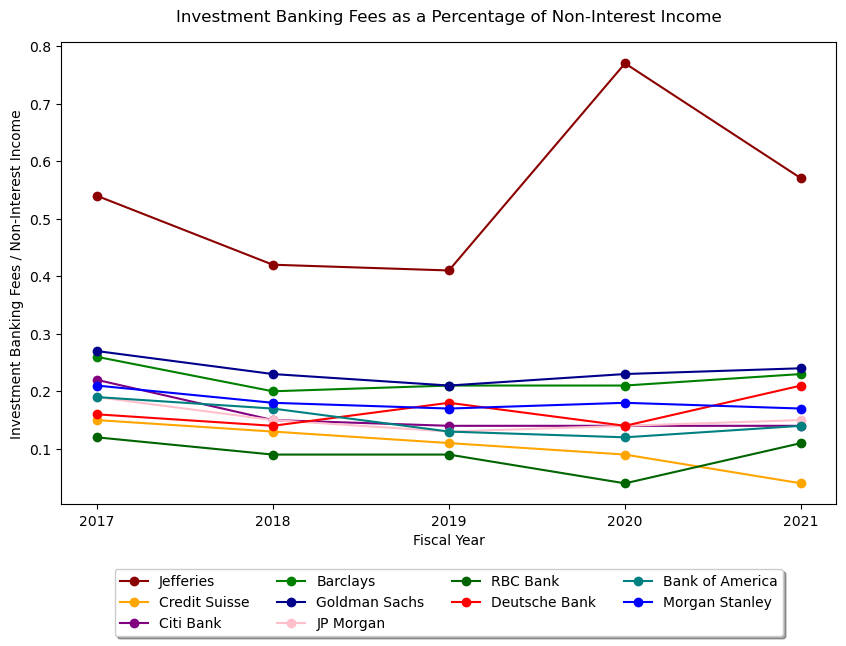

In [11]:
plt.figure(figsize=(10,6))
bank_list = bank_data_df['Bank'].unique()
i = 0
while i < len(bank_list):
    plt.plot(year, bank_data_df.loc[bank_data_df['Bank'] == bank_list[i],
             ['IB Fees as a % of Non-Interest Income']].iloc[::-1], marker ='o',
             color = color_scheme[i], label=bank_list[i])
    i += 1
plt.xticks(x_tick_locations)
plt.title("Investment Banking Fees as a Percentage of Non-Interest Income")
plt.xlabel("Fiscal Year")
plt.ylabel("Investment Banking Fees / Non-Interest Income")
legend= plt.legend(loc='lower center', bbox_to_anchor=(0.5, -.30),
          ncol=4, fancybox=True, shadow=True)

plt.show()

<div class="alert alert-block alert-info">
    <p><h3>The story is different here for Jefferies. While Investment Banking Fees measured against Non-Interest Income tend to trend well below 30% for all the other banks, the Jefferies number is much higher and volatile, ranging between 40% and 80% just in the two-year period of 2019 to 2020.</h3></p>
</div>

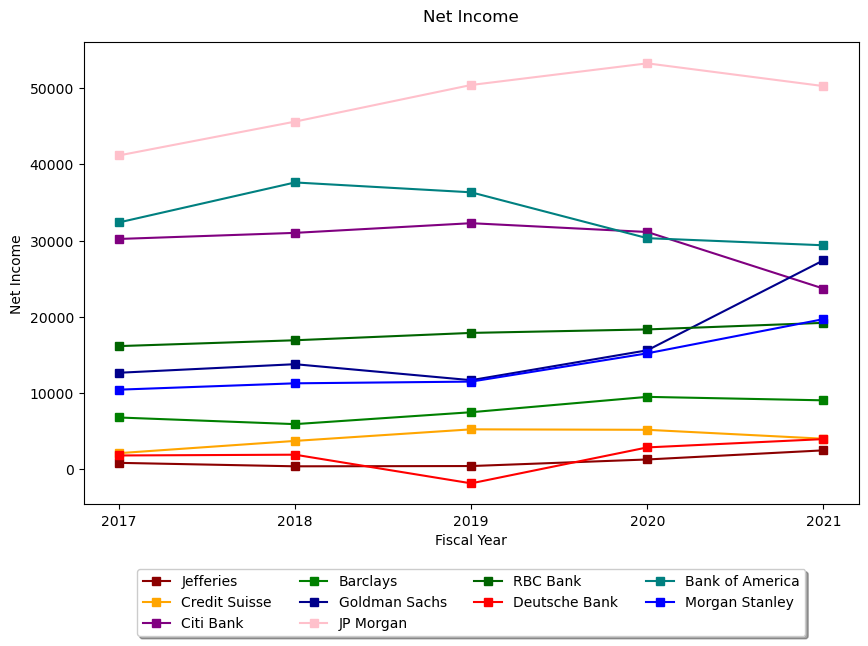

In [12]:
plt.figure(figsize=(10,6))
bank_list = bank_data_df['Bank'].unique()
i = 0
while i < len(bank_list):
    plt.plot(year, bank_data_df.loc[bank_data_df['Bank'] == bank_list[i],
             ['Net Income']], marker ='s',
             color = color_scheme[i], label=bank_list[i])
    i += 1
plt.xticks(x_tick_locations)
plt.title("Net Income")
plt.xlabel("Fiscal Year")
plt.ylabel("Net Income")
legend= plt.legend(loc='lower center', bbox_to_anchor=(0.5, -.30), ncol=4, fancybox=True, shadow=True)

plt.show()

<div class="alert alert-block alert-info">
    <p>
        <h3>Given what we know so far about investment banking fees and other metrics, here is the basic net income number for the banks. We can see JP Morgan with a heavy lead, as well as Bank of America and Goldman Sachs with a very strong showing. </h3>
    </p>
</div>

## What do measures of central tendency and other statistics tell us about the results?

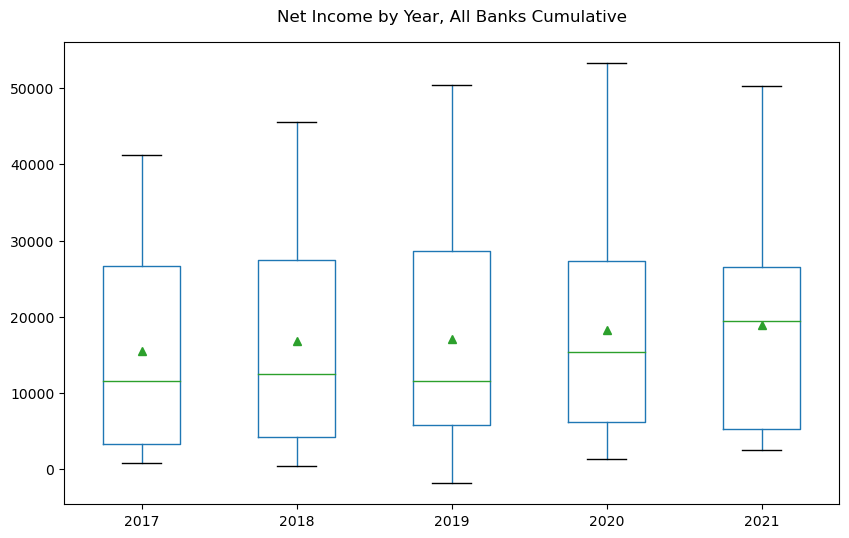

In [13]:
net_income_df = pd.DataFrame()

result_2017 = []
result_2018 = []
result_2019 = []
result_2020 = []
result_2021 = []

i = 0 

for value in bank_data_df['Fiscal Year']:
    if value == 2021:
        result_2021.append(bank_data_df['Net Income'][i])
    elif value == 2020:
        result_2020.append(bank_data_df['Net Income'][i])
    elif value == 2019:
        result_2019.append(bank_data_df['Net Income'][i])
    elif value == 2018:
        result_2018.append(bank_data_df['Net Income'][i])
    else:
        result_2017.append(bank_data_df['Net Income'][i])
    i += 1
    
net_income_df['2017'] = result_2017
net_income_df['2018'] = result_2018
net_income_df['2019'] = result_2019
net_income_df['2020'] = result_2020
net_income_df['2021'] = result_2021

net_income_df.boxplot(grid=False, figsize=(10,6), showmeans=True)

plt.title("Net Income by Year, All Banks Cumulative")

plt.show()

<div class="alert alert-block alert-info">
    <p>
        <h3>When we take all net income datapoints we see fairly stable measures of 
        central tendency with some outperformers at the top end of the data, which as noted above belong mainly to
        JP Morgan, Bank of America, and Goldman Sachs.</h3>
    </p>
</div>

The r-value is : 0.3102789280393081


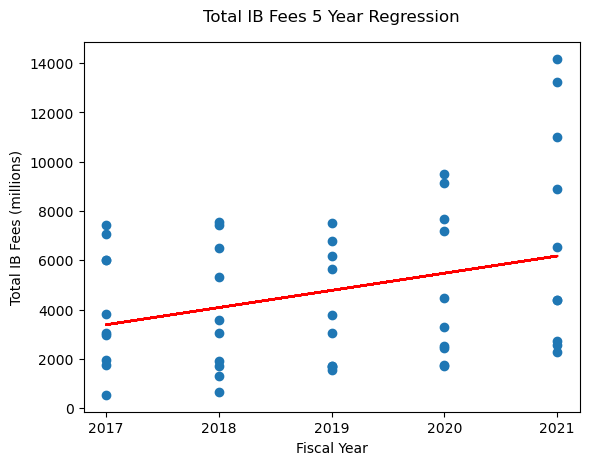

In [14]:
def linear_regression(x,y):
    print(f"The r-value is : {(st.pearsonr(x, y)[0])}")
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

fig1, ax1 = plt.subplots()

equation = linear_regression(bank_data_df["Fiscal Year"], bank_data_df["Total IB Fees"])
annotate(equation, 0, -3)
 
plt.xlabel("Fiscal Year")
plt.ylabel("Total IB Fees (millions)")
plt.xticks(x_tick_locations)
plt.title("Total IB Fees 5 Year Regression")

plt.show()

<div class="alert alert-block alert-info">
    <p>
        <h3>The regression line is positive. Due to the dispersion in the data, measuring one bank by it 
        might not be predictive, but it does indicate a solid uptrend for the last five years 
        in Investment Banks Fees across the industry. </h3>
    </p>
</div>

<h1>Some Conclusions:</h1>

<hr>

<div class="alert alert-block alert-success">
    <ul><h3><b>
        <li>Top investment banks for the last half-decade have not moved much in overall market share.</li>
        <li>Lower market share banks exhibit more volatility than their larger counterparts.</li>
        <li>Smaller investment bank income does not necessarily mean a smaller balance sheet.</li>
        <li>With the exception of Jefferies, Investment Banking fees make up about the same amount of non-interest income for large investment banks.</li>
        <li>For the last five years investment banking activity has been in an upward trend, even during the pandemic.</li></b>
    </ul>
</div>

<hr>